# E-commerce A/B testing to increase revenue

**Objective:** This project addresses a critical business problem for a large e-commerce platform aimed at increasing revenue through optimizing user experience. To achieve this, a series of hypotheses have been developed that require validation through A/B testing. 

**Sources**: data locates at 3 csv-files:

1. hypothesis.csv:
   
    - Hypothesis: A brief description of the hypothesis.
    - Reach: User reach rated on a scale from 1 to 10.
    - Impact: The potential influence on users, rated on a scale from 1 to 10.
    - Confidence: The level of confidence in the hypothesis, rated on a scale from 1 to 10.
    - Efforts: Resource expenditure required to test the hypothesis, rated on a scale from 1 to 10 (higher values indicate greater resource requirements).

<div>

</div>

2. orders.csv:

    - transactionId: Unique identifier for each order.
    - visitorId: Unique identifier for the user who placed the order.
    - date: Date when the order was placed.
    - revenue: Revenue generated from the order.
    - group: A/B test group assigned to the order.

<div>

</div>

3. visitors.csv:

    - date: The date of record.
    - group: A/B test group designation.
    - visitors: Number of users in the specified A/B test group on that date.

<div>

</div>

**Steps:**

1. Hypothesis prioritization:

   - ICE framework to rank 9 revenue-increasing hypotheses by their scores.
   - RICE framework for the same ranking
   - Comparing the results to understand differences in prioritization.

<div>

</div>

2. Evaluating A/B test results:

    - Analysing the impact of changes on key metrics, including:
        - Cumulative revenue by group.
        - Cumulative average check by group.
        - Changes in average check and orders per visitor between groups.
        - Scatter plots for orders per user and order costs, identifying outliers.
        - Statistical significance of differences in key metrics (both raw and cleaned data).
    - Making a decision based on test results regarding next steps.

## Primary data analysis

In [4]:
# library imports

import pandas as pd
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# creating and exploring a dataframe

hypothesis = pd.read_csv('/hypothesis.csv')
orders = pd.read_csv('/orders.csv')
visitors = pd.read_csv('/visitors.csv')

all_dfs = {
    'hypothesis': hypothesis,
    'orders': orders,
    'visitors': visitors
}

for df_name, df in all_dfs.items():
    print(f'DataFrame: {df_name}')  
    print(df.info())
    for _ in range(1):
        print()
    print(df.isna().sum())
    for _ in range(1):
        print()
    print(f'Duplicates in df {df_name}: {df.duplicated().sum()}')
    for _ in range(1):
        print()
    print(df.head())
    for _ in range(3):
        print()

DataFrame: hypothesis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Duplicates in df hypothesis: 0

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...    

### Additional step for hypothesis readability: translating initial data to English

In [7]:
hypothesis['Hypothesis'] = hypothesis['Hypothesis'].replace({
    'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей': 'Add two new channels to attract traffic, allowing to attract 30% more users',
    'Запустить собственную службу доставки, что сократит срок доставки заказов': 'Launch its own delivery service, which will shorten the delivery time of orders',
    'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа':'Add product recommendation blocks to online store website to increase conversion rate and average order receipt',
    'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар':'Change the structure of categories, which will increase the conversion rate, as users will find the desired product faster',
    'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей':'Change the background color of the homepage to increase user engagement',
    'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов':'Add a customer reviews page about the store, which will increase the number of orders',
    'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию':'Show banners with current promotions and sales on the homepage to increase conversion',
    'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок':'Add a subscription form to all main pages to gather a customer base for email newsletters',
    'Запустить акцию, дающую скидку на товар в день рождения':'Run a promo discount on birthday'
})

In [8]:
for i in hypothesis['Hypothesis']:
    print (i)

Add two new channels to attract traffic, allowing to attract 30% more users
Launch its own delivery service, which will shorten the delivery time of orders
Add product recommendation blocks to online store website to increase conversion rate and average order receipt
Change the structure of categories, which will increase the conversion rate, as users will find the desired product faster
Change the background color of the homepage to increase user engagement
Add a customer reviews page about the store, which will increase the number of orders
Show banners with current promotions and sales on the homepage to increase conversion
Add a subscription form to all main pages to gather a customer base for email newsletters
Run a promo discount on birthday


**Summary:**  

1. **Hypotheses:**

    - Contains 9 entries
    - No missing values or duplicates
    - Contains information on a brief description of the hypothesis, user reach on a 10-point scale, impact on users on a 10-point scale, confidence in the hypothesis on a 10-point scale, and resource costs for testing the hypothesis on a 10-point scale
    - Data types are correctly represented and do not require changes

<div>

</div>

2. **Orders:**

   - Contains 1197 entries
   - No missing values or duplicates
   - Contains information on order and user IDs, order date, order revenue, and the A/B test group the order belongs to.
   - The date column needs to be converted to the required datetime format; the object type is not appropriate here

<div>

</div>

3. **Visitors:**

   - Contains 62 entries
   - No missing values or duplicates
   - Contains information on the date, A/B test group, and the number of users on that date in the specified A/B test group
   - The date column needs to be converted to the required datetime format; the object type is not appropriate here


In [10]:
# changing the type to datetime

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

## Hypothesis Prioritization

In [12]:
# ICE calculating
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'],2)
ice_sorted = hypothesis.sort_values(by='ICE', ascending=False).reset_index(drop=False)
ice_sorted

,index,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,8,Run a promo discount on birthday,1,9,9,5,16.20
1,0,"Add two new channels to attract traffic, allow...",3,10,8,6,13.33
2,7,Add a subscription form to all main pages to g...,10,7,8,5,11.20
3,6,Show banners with current promotions and sales...,5,3,8,3,8.00
4,2,Add product recommendation blocks to online st...,8,3,7,3,7.00
5,1,"Launch its own delivery service, which will sh...",2,5,4,10,2.00
6,5,"Add a customer reviews page about the store, w...",3,2,2,3,1.33
7,3,"Change the structure of categories, which will...",8,3,3,8,1.12
8,4,Change the background color of the homepage to...,3,1,1,1,1.00


In [13]:
for i in [0,1,2]:
    print(f"Priority {i+1}: {ice_sorted['Hypothesis'][i]}")

Priority 1: Run a promo discount on birthday
Priority 2: Add two new channels to attract traffic, allowing to attract 30% more users
Priority 3: Add a subscription form to all main pages to gather a customer base for email newsletters


In [14]:
# RICE calculating
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
rice_sorted = hypothesis.sort_values(by='RICE', ascending=False).reset_index(drop=False)
rice_sorted

,index,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,7,Add a subscription form to all main pages to g...,10,7,8,5,11.20,112.0
1,2,Add product recommendation blocks to online st...,8,3,7,3,7.00,56.0
2,0,"Add two new channels to attract traffic, allow...",3,10,8,6,13.33,40.0
3,6,Show banners with current promotions and sales...,5,3,8,3,8.00,40.0
4,8,Run a promo discount on birthday,1,9,9,5,16.20,16.2
5,3,"Change the structure of categories, which will...",8,3,3,8,1.12,9.0
6,1,"Launch its own delivery service, which will sh...",2,5,4,10,2.00,4.0
7,5,"Add a customer reviews page about the store, w...",3,2,2,3,1.33,4.0
8,4,Change the background color of the homepage to...,3,1,1,1,1.00,3.0


In [15]:
for i in [0,1,2]:
    print(f"Priority {i+1}: {rice_sorted['Hypothesis'][i]}")

Priority 1: Add a subscription form to all main pages to gather a customer base for email newsletters
Priority 2: Add product recommendation blocks to online store website to increase conversion rate and average order receipt
Priority 3: Add two new channels to attract traffic, allowing to attract 30% more users


In [16]:
# Let's label the initial indexes as “manual hypothesis id”, it will be easier to refer to them that way 
ice_sorted['index'] += 1
ice_sorted = ice_sorted.rename(columns={'index': 'manual_id'})
ice_sorted

,manual_id,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,9,Run a promo discount on birthday,1,9,9,5,16.20
1,1,"Add two new channels to attract traffic, allow...",3,10,8,6,13.33
2,8,Add a subscription form to all main pages to g...,10,7,8,5,11.20
3,7,Show banners with current promotions and sales...,5,3,8,3,8.00
4,3,Add product recommendation blocks to online st...,8,3,7,3,7.00
5,2,"Launch its own delivery service, which will sh...",2,5,4,10,2.00
6,6,"Add a customer reviews page about the store, w...",3,2,2,3,1.33
7,4,"Change the structure of categories, which will...",8,3,3,8,1.12
8,5,Change the background color of the homepage to...,3,1,1,1,1.00


In [17]:
rice_sorted['index'] += 1
rice_sorted = rice_sorted.rename(columns={'index': 'manual_id'})
rice_sorted

,manual_id,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,8,Add a subscription form to all main pages to g...,10,7,8,5,11.20,112.0
1,3,Add product recommendation blocks to online st...,8,3,7,3,7.00,56.0
2,1,"Add two new channels to attract traffic, allow...",3,10,8,6,13.33,40.0
3,7,Show banners with current promotions and sales...,5,3,8,3,8.00,40.0
4,9,Run a promo discount on birthday,1,9,9,5,16.20,16.2
5,4,"Change the structure of categories, which will...",8,3,3,8,1.12,9.0
6,2,"Launch its own delivery service, which will sh...",2,5,4,10,2.00,4.0
7,6,"Add a customer reviews page about the store, w...",3,2,2,3,1.33,4.0
8,5,Change the background color of the homepage to...,3,1,1,1,1.00,3.0


**Summary:**

After sorting the hypotheses by both metrics, it became evident that depending on the prioritization method, the hypotheses were ranked differently:

1. In the case of ICE, the first hypothesis proposed for testing is number 9: "Run a promo discount on birthday". The second and third places are occupied by hypotheses 1 and 8, respectively: "Add two new channels to attract traffic" and "Add a subscription form to all main pages to gather a customer base for email newsletters"

2. In the case of RICE, the first hypothesis proposed for testing is number 8: "Add a subscription form to all main pages to gather a customer base for email newsletters" The second and third places are occupied by hypotheses 3 and 1, respectively: "Add product recommendation blocks to online store website" and "Add two new channels to attract traffic"

*Why did hypotheses differ from each other?* The hypotheses shifted because when calculating RICE, the reach metric is included in the formula, while it is not in ICE. Thus, those hypotheses that either have a high reach score or serve as a minor addition that slightly outweighs other values have risen to the top. In our case, RICE for hypotheses 1 and 7 is identical, but the third place rightfully goes to hypothesis 1, because its ICE is higher despite having an equal RICE.

## Evaluating A/B test results

### Cumulative revenue

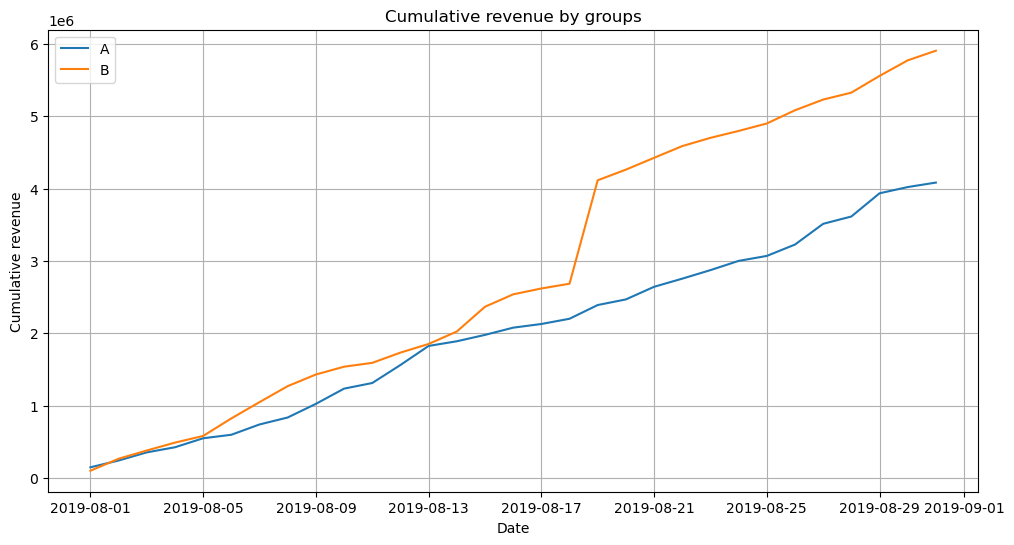

In [21]:
cumulative_revenue = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
cumulative_revenue['cumulative_revenue'] = cumulative_revenue.groupby('group')['revenue'].cumsum()

plt.figure(figsize=(12, 6))
for group in cumulative_revenue['group'].unique():
    group_data = cumulative_revenue[cumulative_revenue['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_revenue'], label=group)
plt.title('Cumulative revenue by groups')
plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.legend()
plt.grid()
plt.show()

**Summary:**

- At the beginning, both lines start equally; however, on the fourth day of the test, Group B confidently surpasses Group A in terms of revenue from orders
- Further along, we will see only one point of intersection between the lines in the middle of the testing period; otherwise, Group B steadily leads 
- This graph shows a sharp increase in growth for Group B at the end of August. After that, there will be no more sharp increases
- The line for Group A moves evenly, without fluctuations

Thus, this graph clearly demonstrates the dominance of Group B over Group A in terms of cumulative revenue.

### Cumulative average check

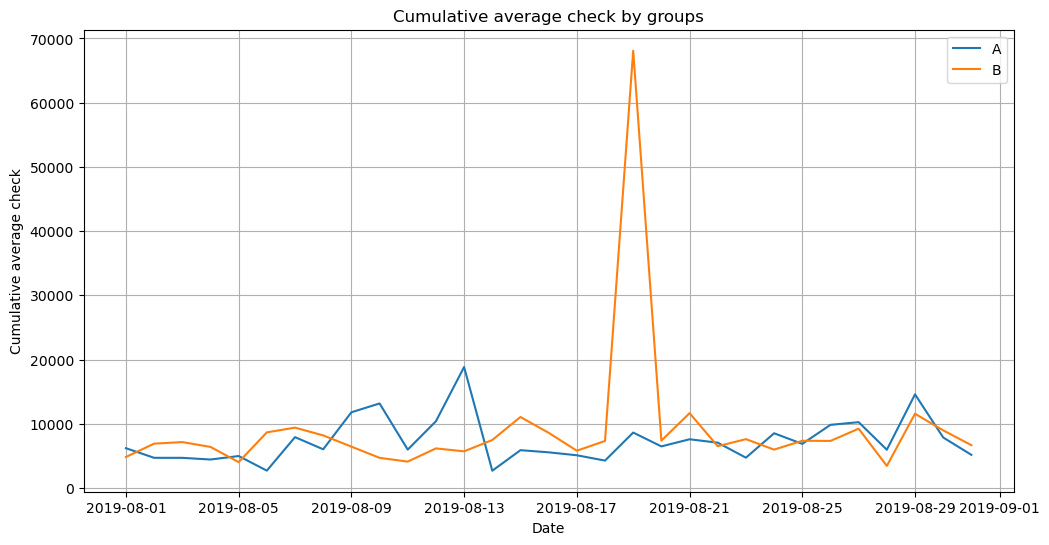

In [24]:
orders_count = orders.groupby(['date', 'group']).agg({'transactionId': 'count', 'revenue': 'sum'}).rename(columns={'transactionId': 'orders_count'}).reset_index()
cumulative_data = pd.merge(orders_count, cumulative_revenue.drop(columns=['revenue']), on=['date', 'group'])

cumulative_data['cumulative_avg_check'] = cumulative_data['revenue'] / cumulative_data['orders_count']

plt.figure(figsize=(12, 6))
for group in cumulative_data['group'].unique():
    group_data = cumulative_data[cumulative_data['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_avg_check'], label=group)
plt.title('Cumulative average check by groups')
plt.xlabel('Date')
plt.ylabel('Cumulative average check')
plt.legend()
plt.grid()
plt.show()

**Summary:**

- In both cases, it is not possible to speak of a stable decrease or stable increase in the average check. There is no trend towards an increase or decrease in either Group A or Group B
- There are outliers in both groups: Group B shows a much more pronounced peak in the average check in the middle of the testing period. The spike in Group A occurred slightly earlier and is approximately 7 times smaller than that of the second group. Outliers may be caused by the purchase of expensive items
- Both groups have unstable graphs. While there is no trend towards an increase or decrease, the fluctuations in the graphs are evident

Thus, for a more accurate interpretation of the graph, it is necessary to construct a graph of the relative change in the cumulative average check of Group B compared to Group A.

### Relative change in the cumulative average check of Group B compared to Group A

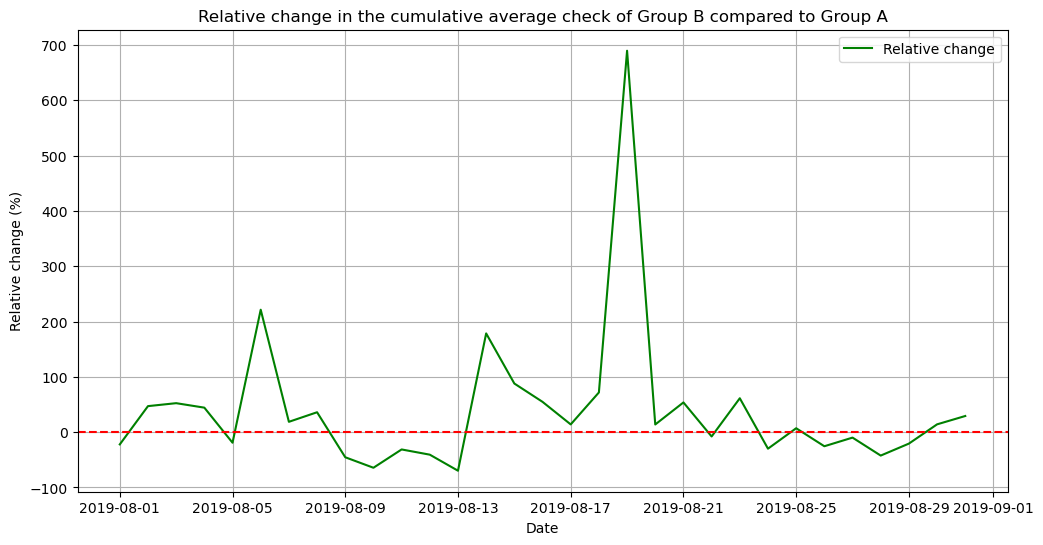

In [27]:
avg_check_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'cumulative_avg_check']]
avg_check_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'cumulative_avg_check']]
avg_check_B.rename(columns={'cumulative_avg_check': 'cumulative_avg_check_B'}, inplace=True)


merged_avg_checks = pd.merge(avg_check_A, avg_check_B, on='date', how='outer')

merged_avg_checks['relative_change'] = (merged_avg_checks['cumulative_avg_check_B'] - merged_avg_checks['cumulative_avg_check']) / merged_avg_checks['cumulative_avg_check'] * 100

plt.figure(figsize=(12, 6))
plt.plot(merged_avg_checks['date'], merged_avg_checks['relative_change'], label='Relative change', color='green')
plt.title('Relative change in the cumulative average check of Group B compared to Group A')
plt.xlabel('Date')
plt.ylabel('Relative change (%)')
plt.axhline(0, color='red', linestyle='--') 
plt.legend()
plt.grid()
plt.show()

**Summary:**

Overall, one can speak of a slight advantage in the average check of Group B; however, this advantage is partially explained by a significant outlier, which reached 700% on August 19. It is important to note that such a sharp spike can arise from specific circumstances, such as large orders or promotions. Therefore, based on the current data, the relationship of the cumulative average check has not yet stabilized, and it is premature to draw definitive conclusions from the test. For a more accurate interpretation of the results, a detailed analysis of anomalies is necessary to understand their impact on the overall dynamics and to make informed decisions regarding further steps.

### Cumulative average number of orders per visitor by group

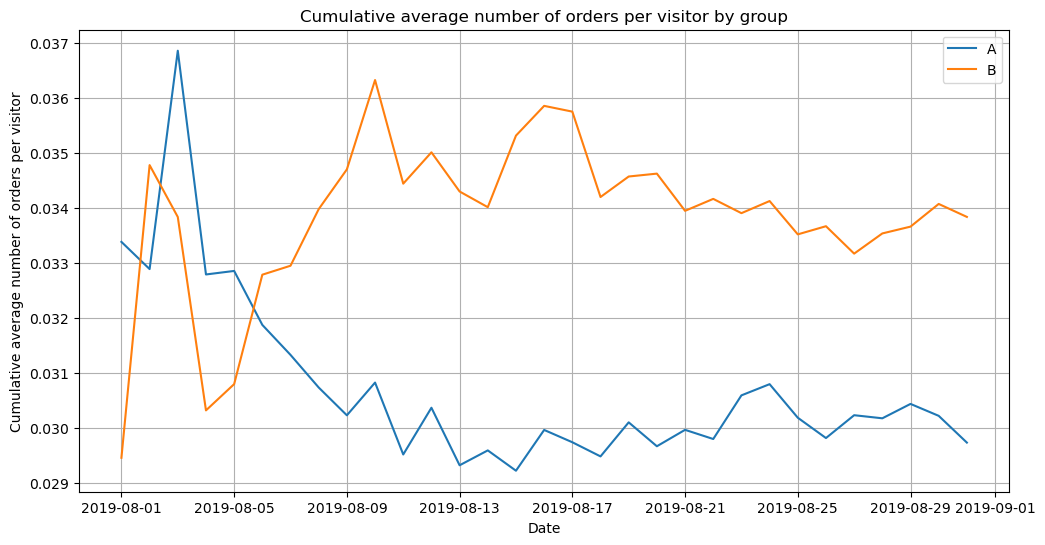

In [30]:
orders_count = orders.groupby(['date', 'group']).agg({'transactionId': 'count'}).rename(columns={'transactionId': 'orders_count'}).reset_index()

cumulative_data = pd.merge(orders_count, visitors, on=['date', 'group'], how='inner')

cumulative_data['cumulative_orders'] = cumulative_data.groupby('group')['orders_count'].cumsum()
cumulative_data['cumulative_visitors'] = cumulative_data.groupby('group')['visitors'].cumsum()

cumulative_data['avg_orders_per_visitor'] = cumulative_data['cumulative_orders'] / cumulative_data['cumulative_visitors']

plt.figure(figsize=(12, 6))
for group in cumulative_data['group'].unique():
    group_data = cumulative_data[cumulative_data['group'] == group]
    plt.plot(group_data['date'], group_data['avg_orders_per_visitor'], label=group)

plt.title('Cumulative average number of orders per visitor by group')
plt.xlabel('Date')
plt.ylabel('Cumulative average number of orders per visitor')
plt.legend()
plt.grid()
plt.show()

**Summary:** 
Despite the fact that the indicator has not stabilized and there are fluctuations in the values, the graph clearly shows a stable trend of decreasing average orders per visitor in Group A, while Group B exhibits a stable increase. In this test, we can speak of an advantage for Group B. We will separately check the relative change in the indicator in the next section.

### Relative change in the cumulative average number of orders per visitor of group B to group A

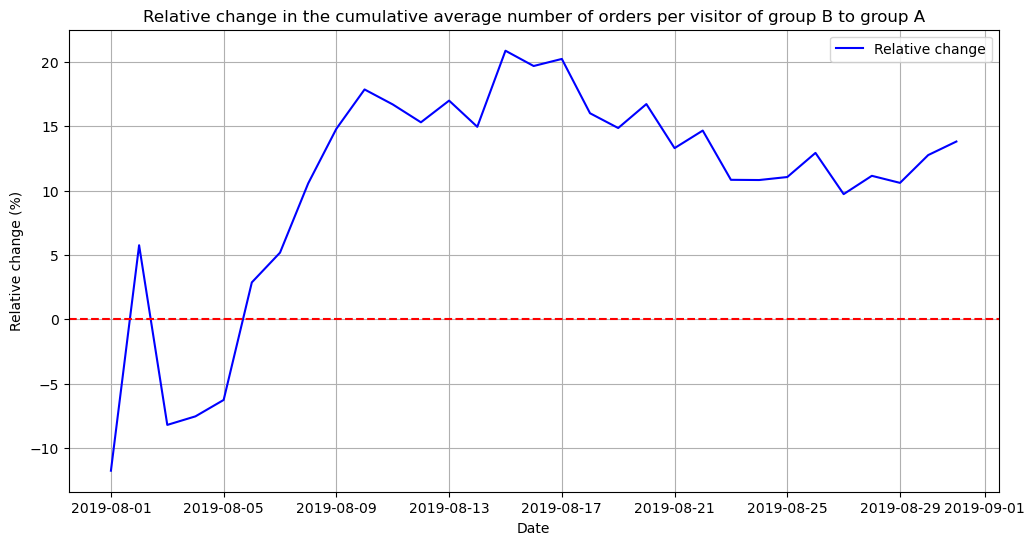

In [33]:
avg_orders_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'avg_orders_per_visitor']]
avg_orders_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'avg_orders_per_visitor']]

avg_orders_B.rename(columns={'avg_orders_per_visitor': 'avg_orders_B'}, inplace=True)

merged_orders = pd.merge(avg_orders_A, avg_orders_B, on='date', how='outer')

merged_orders['relative_change'] = (merged_orders['avg_orders_B'] - merged_orders['avg_orders_per_visitor']) / merged_orders['avg_orders_per_visitor'] * 100

plt.figure(figsize=(12, 6))
plt.plot(merged_orders['date'], merged_orders['relative_change'], label='Relative change', color='blue')
plt.title('Relative change in the cumulative average number of orders per visitor of group B to group A')
plt.xlabel('Date')
plt.ylabel('Relative change (%)')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
plt.show()

**Summary:** The advantage of Group B has been confirmed - on the eighth day of the test, its indicator showed at least a 10% advantage over Group A. This indicates that the strategy chosen for Group B clearly provides a higher average number of orders per visitor compared to Group A.

### Number of orders by user

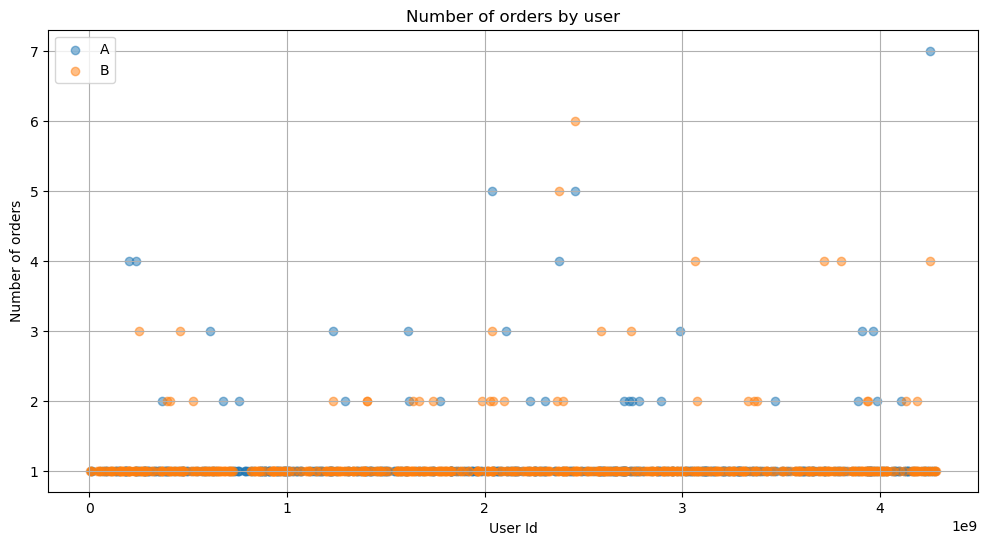

In [36]:
user_orders = orders.groupby(['visitorId', 'group'], as_index=False).agg({'transactionId': 'count'}).sort_values(by='group').rename(columns={'transactionId': 'orders_count'})

plt.figure(figsize=(12, 6))
for group in user_orders['group'].unique():
    group_data = user_orders[user_orders['group'] == group]
    plt.scatter(x=group_data['visitorId'], y=group_data['orders_count'], alpha=0.5, label=group)

plt.title('Number of orders by user')
plt.xlabel('User Id')
plt.ylabel('Number of orders')
plt.legend()
plt.grid()
plt.show()

**Summary:** The distribution of the number of orders during the study period per user did not show significant differences between the groups - in both groups, the overwhelming majority of clients made one order per month. Some customers made more than one order, but even here they were equally distributed between the groups

### Orders revenue

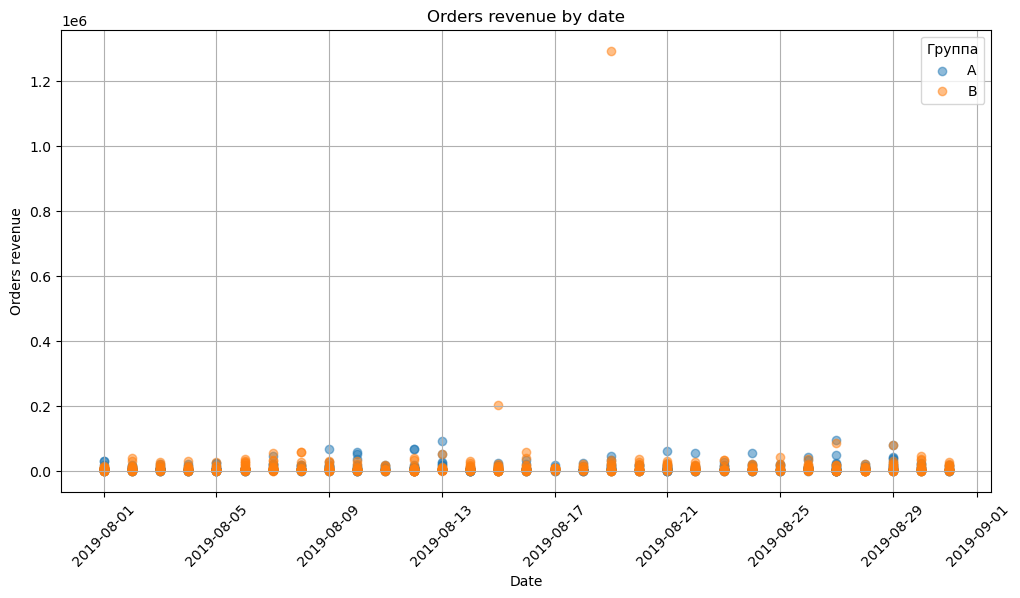

In [39]:
orders = orders.sort_values(by='group')

plt.figure(figsize=(12, 6))
for group in orders['group'].unique():
    group_data = orders[orders['group'] == group]
    plt.scatter(group_data['date'], group_data['revenue'], alpha=0.5, label=group)

plt.title('Orders revenue by date')
plt.xlabel('Date')
plt.ylabel('Orders revenue')
plt.xticks(rotation=45)
plt.legend(title='Группа')
plt.grid()
plt.show()

**The constructed graph is heavily 'compressed' due to the presence of a large outlier in revenue per order. We will set an upper limit on the Y-axis to make the data easier to analyze**

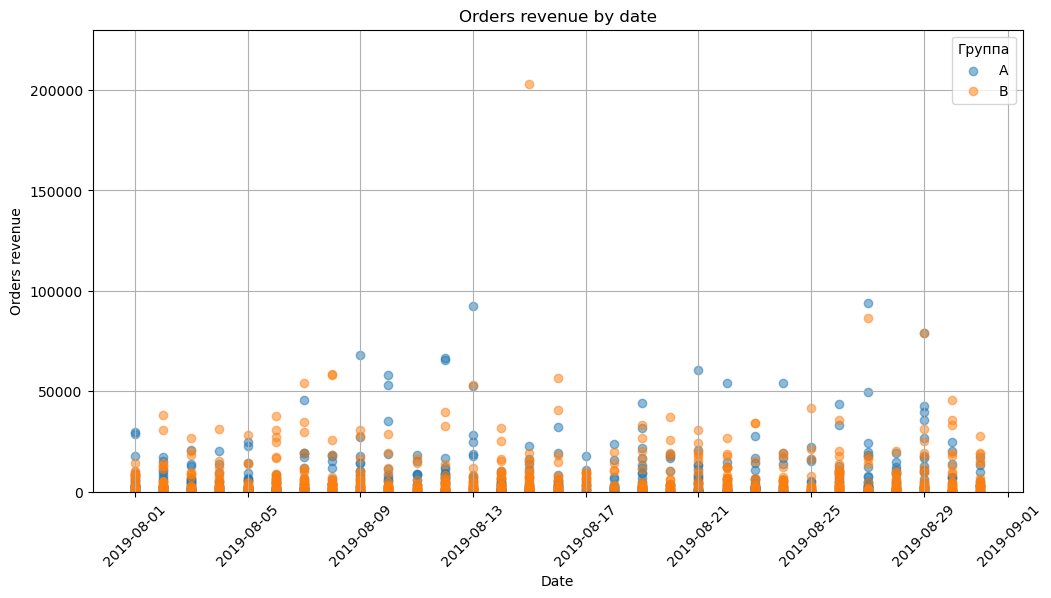

In [41]:
plt.figure(figsize=(12, 6))
for group in orders['group'].unique():
    group_data = orders[orders['group'] == group]
    plt.scatter(group_data['date'], group_data['revenue'], alpha=0.5, label=group)

plt.ylim(0, 230000)    
plt.title('Orders revenue by date')
plt.xlabel('Date')
plt.ylabel('Orders revenue')
plt.xticks(rotation=45)
plt.legend(title='Группа')
plt.grid()
plt.show()

**Summary:** 

Thus, having established a boundary that cuts off the outlier, we obtained a more convenient and detailed graph of revenue distribution by orders over the days. The graph shows that there is no clear superiority of one group over the other - revenue is distributed evenly. We can speak of two one-time outliers where revenue per order is significantly above average. All these outliers belong to Group B, but due to their uniqueness, they do not appear as a systematic increase in value - it is more of a coincidence than a correlation. 

For further analysis, we will highlight a boundary from which we can talk about anomalous values in order costs. For this, we will obtain the 95th and 99th percentiles.

### 95th and 99th percentiles of orders revenue

In [44]:
percentile_95 = orders['revenue'].quantile(0.95)
percentile_99 = orders['revenue'].quantile(0.99)

print('95th percentile:', percentile_95)
print('99th percentile:', percentile_99)

anomaly_threshold = percentile_95  
print('Boundary for abnormal orders:', anomaly_threshold)

95th percentile: 28000.000000000004
99th percentile: 58233.19999999999
Boundary for abnormal orders: 28000.000000000004


**Summary:** 
The boundary for defining anomalies has been established - starting from 28000 currency units (the 95th percentile), an order is considered anomalous and should not be included in the cleaned data. Onward, we will calculate the statistical significance for the raw and cleaned data sets.

### Statistical Significance of differences in average number of orders per visitor between groups (raw data)

**Null Hypothesis (H0):**
The average number of orders per visitor in the variant group does not exceed the average number of orders per visitor in the control group. (The average number of orders per visitor for Group A is equal to the average number of orders per visitor for Group B).

**Alternative Hypothesis (H1):**
The average number of orders per visitor in the variant group exceeds the average number of orders per visitor in the control group. (The average number of orders per visitor for Group B is greater than the average number of orders per visitor for Group A).

In [47]:
order_counts_A = orders[orders['group'] == 'A']['transactionId'].count()
order_counts_B = orders[orders['group'] == 'B']['transactionId'].count()

visitors_A = visitors[visitors['group'] == 'A']['visitors'].sum()
visitors_B = visitors[visitors['group'] == 'B']['visitors'].sum()

orders_per_visitor_A = orders[orders['group'] == 'A'].groupby('visitorId')['transactionId'].count()
orders_per_visitor_B = orders[orders['group'] == 'B'].groupby('visitorId')['transactionId'].count()

t_stat, p_value = stats.ttest_ind(orders_per_visitor_A, orders_per_visitor_B)

print('t-stat:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print("Statistically significant differences exist")
else:
    print("No statistically significant differences")

t-stat: 0.5224474609480537
p-value: 0.6014652744511322
No statistically significant differences


**Summary:** When analyzing the average number of orders per visitor between Groups A and B, it was found that the t-statistic is 0.52, and the p-value is 0.60. This indicates a lack of statistically significant differences between the groups.

The t-value of 0.52 shows that the difference in the average number of orders per visitor between the two groups is small. Since the t-value is close to zero, it suggests that the differences between the groups may be insignificant. The p-value of 0.60, which exceeds the threshold of 0.05, confirms this interpretation: it indicates a high probability that the observed difference is random. Thus, taken together, these values provide grounds to state that there is currently no compelling evidence of statistically significant differences in the average number of orders per visitor between Groups A and B.

### Statistical Significance of differences in average order revenue between groups (raw data)

**Null Hypothesis (H0):**
The average order revenue in the variant group does not exceed the average order revenue in the control group. (The average order revenue for Group A is equal to the average order revenue for Group B).

**Alternative Hypothesis (H1):**
The average order revenue in the variant group exceeds the average order revenue in the control group. (The average order revenue for Group B is greater than the average order revenue for Group A).

In [50]:
average_revenue_A = orders[orders['group'] == 'A']['revenue'].mean()
average_revenue_B = orders[orders['group'] == 'B']['revenue'].mean()

t_stat_revenue, p_value_revenue = stats.ttest_ind(orders[orders['group'] == 'A']['revenue'], 
                                                   orders[orders['group'] == 'B']['revenue'])
print('t-stat (revenue):', t_stat_revenue)
print('p-value (revenue):', p_value_revenue)

if p_value_revenue < 0.05:
    print("Statistically significant differences exist")
else:
    print("No statistically significant differences")

t-stat (revenue): -0.8353397071852605
p-value (revenue): 0.403693443754076
No statistically significant differences


**Summary:** In examining the differences in the average order revenue between groups A and B, the following results were obtained: the t-statistic is -0.83, and the p-value is 0.40. This also indicates a lack of statistical significance in the differences. 

The t-value of -0.83 suggests that the average order revenues between the groups are close and do not demonstrate a significant difference. The negative t-value indicates that the average order revenue for group B may be lower than that of group A; however, the difference is small. The p-value of 0.40, which is significantly higher than 0.05, indicates a high probability that these differences may be random and are not the result of any systematic factor. Thus, in this situation, the t-value and p-value together confirm that there are no statistically significant differences in the average order revenue between the tested groups.

### Statistical Significance of differences in average number of orders per visitor between groups (cleaned data)

**Null Hypothesis (H0):**
The average number of orders per visitor in the variant group does not exceed the average number of orders per visitor in the control group. (The average number of orders per visitor for Group A is equal to the average number of orders per visitor for Group B).

**Alternative Hypothesis (H1):**
The average number of orders per visitor in the variant group exceeds the average number of orders per visitor in the control group. (The average number of orders per visitor for Group B is greater than the average number of orders per visitor for Group A).

In [53]:
cleaned_orders = orders[orders['revenue'] <= anomaly_threshold]
cleaned_orders_A = cleaned_orders[cleaned_orders['group'] == 'A']
cleaned_orders_B = cleaned_orders[cleaned_orders['group'] == 'B']

visitors_A = visitors[visitors['group'] == 'A']['visitors'].sum()
visitors_B = visitors[visitors['group'] == 'B']['visitors'].sum()

orders_per_visitor_A_cleaned = cleaned_orders_A.groupby('visitorId')['transactionId'].count()
orders_per_visitor_B_cleaned = cleaned_orders_B.groupby('visitorId')['transactionId'].count()

t_stat_cleaned, p_value_cleaned = stats.ttest_ind(orders_per_visitor_A_cleaned, orders_per_visitor_B_cleaned)

print('t-stat (cleaned data):', t_stat_cleaned)
print('p-value (cleaned data):', p_value_cleaned)

if p_value_cleaned < 0.05:
    print("Statistically significant differences exist")
else:
    print("No statistically significant differences")

t-stat (cleaned data): 0.7113757534616725
p-value (cleaned data): 0.47701186650777283
No statistically significant differences


**Summary:** When analyzing the average number of orders per visitor between groups A and B, after removing anomalies, it was found that the t-statistic is 0.71, and the p-value is 0.48. This indicates an absence of statistically significant differences between the groups. 

The t-value of 0.71 shows that the difference in the average number of orders per visitor between the two groups is small. Since the t-value is close to zero, this suggests that the differences between the groups may be insignificant. The p-value of 0.48, exceeding the threshold of 0.05, confirms this interpretation and indicates a high probability that the observed difference is random. Thus, these values provide grounds to state that there is currently no compelling evidence of statistically significant differences in the average number of orders per visitor between groups A and B.

### Statistical Significance of differences in average order revenue between groups (cleaned data)

**Null Hypothesis (H0):** The average order revenue in the variant group does not exceed the average order revenue in the control group. (The average order revenue for Group A is equal to the average order revenue for Group B).

**Alternative Hypothesis (H1):** The average order revenue in the variant group exceeds the average order revenue in the control group. (The average order revenue for Group B is greater than the average order revenue for Group A).

In [56]:
average_revenue_A_cleaned = cleaned_orders_A['revenue'].mean()
average_revenue_B_cleaned = cleaned_orders_B['revenue'].mean()

t_stat_revenue_cleaned, p_value_revenue_cleaned = stats.ttest_ind(cleaned_orders_A['revenue'], 
                                                                  cleaned_orders_B['revenue'])
print('t-stat (cleaned data revenue):', t_stat_revenue_cleaned)
print('p-value (cleaned data revenue):', p_value_revenue_cleaned)

if p_value_cleaned < 0.05:
    print("Statistically significant differences exist")
else:
    print("No statistically significant differences")

t-stat (cleaned data revenue): 0.243827419058848
p-value (cleaned data revenue): 0.8074085481926553
No statistically significant differences


**Summary:** During the study of differences in average order revenue between groups A and B, after removing anomalies, the following results were obtained: the t-statistic is 0.24, and the p-value is 0.81. This also indicates a lack of statistical significance in the differences. 

The t-value of 0.24 suggests that the average order revenues between the groups are close and do not demonstrate a significant difference. Since the t-value is close to zero, this indicates that the differences between the groups are insignificant. The p-value of 0.81, significantly exceeding 0.05, indicates a high probability that these differences are random and not the result of any systematic factor. Thus, the t-value and p-value together confirm that there are no statistically significant differences in the average order revenue between the tested groups.

### Decision making

In [59]:
if p_value < 0.05:
    print("Based on the raw data, statistically significant differences between groups can be recorded.")
else:
    print("Based on the raw data, statistically significant differences between groups cannot be recorded.")

if p_value_cleaned < 0.05:
    print("Based on the cleaned data, statistically significant differences between groups can be recorded.")
else:
    print("Based on the cleaned data, statistically significant differences between groups cannot be recorded.")

Based on the raw data, statistically significant differences between groups cannot be recorded.
Based on the cleaned data, statistically significant differences between groups cannot be recorded.


**Summary:** Based on the conducted A/B testing and the analysis of the collected data, the following conclusions can be drawn:

1. Comparative Results: Group B demonstrates a consistent advantage over Group A in several metrics, including cumulative revenue and the average number of orders per visitor. By the 8th day of the test, Group B confidently maintains an advantage of at least 10% compared to Group A.

2. Outliers and Anomalies: The identified outliers, represented by one-time high revenue values for Group B, do not indicate a stable growth trend but rather random circumstances, highlighting the need for further analysis.

3. Absence of Fundamental Differences: There is no clear superiority of one group in the distribution of orders per user, Groups A and B exhibit similar patterns of behavior among customers, where most users make only one order per month. Similarly, no differences are observed for the revenue per order by dates.

4. Statistical Significance: The results obtained indicate that no statistically significant differences were found between the groups in the cleaned data, both in the average number of orders per visitor (t-statistic 0.71, p-value 0.48) and in the average order value (t-statistic 0.24, p-value 0.81).

Given the above, it is recommended to continue testing. This will allow:

- To form more substantiated conclusions about the long-term effectiveness and sustainability of the strategy applied in Group B.
- To eliminate the influence of outliers and anomalies on the data, clarifying the results and confirming that the obtained results remain stable and proven.

Thus, it is more prudent at this stage to continue testing to ensure the validity of the obtained data and to assess the impact of changes in a longer-term perspective.

### Final conclusion

As a result of the conducted A/B testing and analysis of the collected data, significant results were obtained, allowing for several conclusions regarding user interaction and the effectiveness of the applied strategies.

1. **Comparative results:** Group B demonstrated a stable advantage in cumulative revenue and the average number of orders per visitor compared to Group A. By the 8th day of the test, Group B maintained an advantage of at least 10%, indicating a more successful strategy for attracting and retaining customers.

2. **Outliers and anomalies:** It was found that one-time high revenue values for Group B do not indicate sustainable growth but are rather random anomalies that should be considered when interpreting the results.

3. **Absence of fundamental differences:** The distribution of the number of orders per user showed that both groups predominantly have one order per month. No differences in user behavior between the control and experimental groups were observed.

4. **Statistical Significance:**  Statistical methods confirmed the absence of significant differences between the groups in both the average number of orders per visitor and the average order value. This is supported by t-statistics and p-values, indicating the need for additional tests for reliable assessment.

5. **Recommendations:**

   - Based on the above conclusions, it is recommended to continue testing for a deeper analysis. This will help to eliminate the influence of outliers and anomalies and provide an opportunity to confirm the stability and longevity of the observed effects.
   - It is important to gather additional data for a more accurate assessment of the impact of changes, which will further help in making informed decisions for optimizing business strategies.